In [12]:
import numpy as np
from torch.autograd import Variable
import torch



car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np
car_price_np = car_price_np.reshape(-1,1)
#-1 yani be andaze hamoon araye mishe benevisim 7
car_price_np
car_price_tensor = Variable(torch.from_numpy(car_price_np))

#az numpy be torch tabdil mikone

car_price_tensor


tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [14]:
# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))
number_of_car_sell_tensor

tensor([[7.5000],
        [7.0000],
        [6.5000],
        [6.0000],
        [5.5000],
        [5.0000],
        [4.5000]])

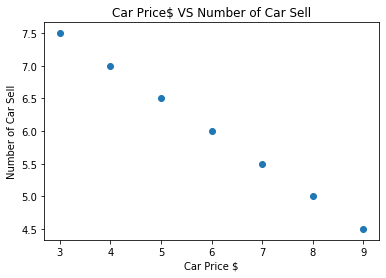

In [15]:
# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

epoch 0, loss 7.923374176025391
epoch 50, loss 5.274293422698975
epoch 100, loss 3.5640621185302734
epoch 150, loss 2.4083871841430664
epoch 200, loss 1.6274470090866089
epoch 250, loss 1.099733829498291
epoch 300, loss 0.7431354522705078
epoch 350, loss 0.5021682977676392
epoch 400, loss 0.339336097240448
epoch 450, loss 0.229303777217865
epoch 500, loss 0.1549500674009323
epoch 550, loss 0.10470612347126007
epoch 600, loss 0.07075466215610504
epoch 650, loss 0.04781167954206467
epoch 700, loss 0.03230844810605049
epoch 750, loss 0.02183198183774948
epoch 800, loss 0.014752781018614769
epoch 850, loss 0.009969101287424564
epoch 900, loss 0.006736582610756159
epoch 950, loss 0.004552212078124285
epoch 1000, loss 0.003076177556067705


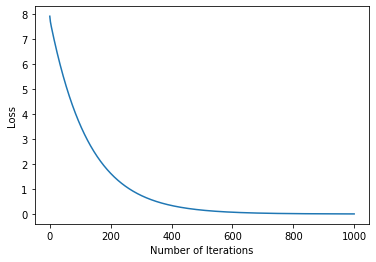

In [16]:

import torch.nn as nn 
import warnings
warnings.filterwarnings("ignore")

class test(nn.Module):
    
    #az class nn.module dare inherit mikone
    
    def __init__(self,input_size,output_size):
        
        #init hamoon constructore 
        #self eshare mikone be instance class
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        
        super(test,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = test(input_dim,output_dim) # input and output size are 1

# MSE
mse = nn.MSELoss()
# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    #results hamoon y mishe ke sell ro hesab mikone
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    #tafavote sell mohasebe shode va sell ke az aval dashtim 
     # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

In [9]:
model


test(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [10]:
predicted = model(car_price_tensor).data.numpy()
predicted

array([[7.393895],
       [6.922962],
       [6.452029],
       [5.981096],
       [5.510163],
       [5.03923 ],
       [4.568297]], dtype=float32)

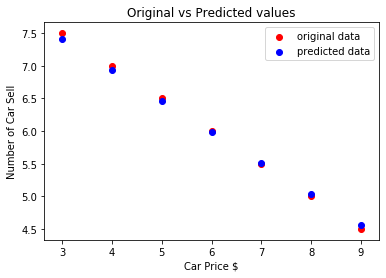

In [18]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()

#code bala error dasht va nashod ejra konam.nafahmidam che moshkeli dare

#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()